# 4.CLUSTERS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

### Leyendo CSV

In [3]:
file_name1 = dir_origen_csv + "Data_filt_horas_ceros.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df["fecha"] =  pd.to_datetime(df["fecha"]) #transforming "fecha" to datetime

In [54]:
df['dayNumber'] = df['fecha'].dt.dayofweek
df

,medidor,fecha,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,dayNumber,LJ_manana,LJ_tarde,LJ_noche,V_manana,V_tarde,V_noche,SD_manana,SD_tarde,SD_noche
0,15029828,2019-04-04 09:01:02,1143130,114.6726,114.8017,115.2943,2.0728,0.8169,0.9463,A3,...,3,26.4075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15029828,2019-04-04 11:00:58,1143509,114.6649,114.8677,114.8779,1.9875,0.3203,0.6920,A3,...,3,158.3400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15029828,2019-04-04 13:00:59,1143880,114.8444,115.3403,115.6252,1.9815,0.8929,0.8766,A3,...,3,NaN,382.2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15029828,2019-04-04 15:01:02,1144272,114.6778,114.8357,114.4145,1.9633,0.9327,0.9178,A3,...,3,NaN,428.7150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15029828,2019-04-04 17:01:02,1144628,116.9224,117.2767,117.0052,2.6013,0.4311,1.2383,A3,...,3,NaN,413.5950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15029828,2019-04-04 19:01:02,1145053,114.1925,114.8132,115.2102,2.5062,0.4349,1.2263,A3,...,3,NaN,NaN,15.0150,NaN,NaN,NaN,NaN,NaN,NaN
6,15029828,2019-04-05 09:01:03,1148042,116.4599,116.4413,116.5216,2.6279,0.4364,1.2431,A3,...,4,NaN,NaN,NaN,35.2275,NaN,NaN,NaN,NaN,NaN
7,15029828,2019-04-05 13:08:58,1149035,114.3455,114.0721,113.9389,2.5562,0.4378,1.2162,A3,...,4,NaN,NaN,NaN,NaN,23.5200,NaN,NaN,NaN,NaN
8,15029828,2019-04-05 15:40:19,1149560,117.0340,116.8882,117.2858,2.5909,0.3984,1.2069,A3,...,4,NaN,NaN,NaN,NaN,62.3175,NaN,NaN,NaN,NaN
9,15029828,2019-04-05 17:40:18,1149951,117.3378,117.1492,117.3656,2.6382,0.4353,1.2445,A3,...,4,NaN,NaN,NaN,NaN,19.5300,NaN,NaN,NaN,NaN


### Division por franjas horarias

In [5]:
df['LJ_manana']= df.loc[(df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']>=0) & (df['dayNumber']<=3),:]['kwh_consumido'] 
df['LJ_tarde']= df.loc[(df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']>=0) & (df['dayNumber']<=3),:]['kwh_consumido'] 
df['LJ_noche']= df.loc[(df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']>=0) & (df['dayNumber']<=3),:]['kwh_consumido'] 
df['V_manana']= df.loc[(df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['V_tarde']= df.loc[(df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['V_noche']= df.loc[(df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']==4),:]['kwh_consumido'] 
df['SD_manana']= df.loc[(df['hora']<=11) & (df['hora']>=0) & (df['dayNumber']>=5) & (df['dayNumber']<=6),:]['kwh_consumido'] 
df['SD_tarde']= df.loc[(df['hora']<=18) & (df['hora']>=12) & (df['dayNumber']>=5) & (df['dayNumber']<=6),:]['kwh_consumido'] 
df['SD_noche']= df.loc[(df['hora']<=23) & (df['hora']>=19) & (df['dayNumber']>=5) & (df['dayNumber']<=6),:]['kwh_consumido'] 

df

,medidor,fecha,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,dayNumber,LJ_manana,LJ_tarde,LJ_noche,V_manana,V_tarde,V_noche,SD_manana,SD_tarde,SD_noche
0,15029828,2019-04-04 09:01:02,1143130,114.6726,114.8017,115.2943,2.0728,0.8169,0.9463,A3,...,3,26.4075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15029828,2019-04-04 11:00:58,1143509,114.6649,114.8677,114.8779,1.9875,0.3203,0.6920,A3,...,3,158.3400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15029828,2019-04-04 13:00:59,1143880,114.8444,115.3403,115.6252,1.9815,0.8929,0.8766,A3,...,3,NaN,382.2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15029828,2019-04-04 15:01:02,1144272,114.6778,114.8357,114.4145,1.9633,0.9327,0.9178,A3,...,3,NaN,428.7150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15029828,2019-04-04 17:01:02,1144628,116.9224,117.2767,117.0052,2.6013,0.4311,1.2383,A3,...,3,NaN,413.5950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15029828,2019-04-04 19:01:02,1145053,114.1925,114.8132,115.2102,2.5062,0.4349,1.2263,A3,...,3,NaN,NaN,15.0150,NaN,NaN,NaN,NaN,NaN,NaN
6,15029828,2019-04-05 09:01:03,1148042,116.4599,116.4413,116.5216,2.6279,0.4364,1.2431,A3,...,4,NaN,NaN,NaN,35.2275,NaN,NaN,NaN,NaN,NaN
7,15029828,2019-04-05 13:08:58,1149035,114.3455,114.0721,113.9389,2.5562,0.4378,1.2162,A3,...,4,NaN,NaN,NaN,NaN,23.5200,NaN,NaN,NaN,NaN
8,15029828,2019-04-05 15:40:19,1149560,117.0340,116.8882,117.2858,2.5909,0.3984,1.2069,A3,...,4,NaN,NaN,NaN,NaN,62.3175,NaN,NaN,NaN,NaN
9,15029828,2019-04-05 17:40:18,1149951,117.3378,117.1492,117.3656,2.6382,0.4353,1.2445,A3,...,4,NaN,NaN,NaN,NaN,19.5300,NaN,NaN,NaN,NaN


In [6]:
df_medidor_franjas = df[['medidor','LJ_manana','LJ_tarde','LJ_noche','V_manana','V_tarde','V_noche','SD_manana','SD_tarde','SD_noche']].groupby('medidor').sum()
df_medidor_franjas

,LJ_manana,LJ_tarde,LJ_noche,V_manana,V_tarde,V_noche,SD_manana,SD_tarde,SD_noche
medidor,,,,,,,,,
15029828,13162.695000,32500.492500,3551.992500,1454.512500,3989.055000,350.805000,1294.702500,2133.075000,421.470000
15029835,117.894000,240.315000,24.264000,7.881000,14.493000,16.353000,366.159000,402.321000,57.306000
15029844,383.406000,517.584000,26.934000,151.596000,151.584000,2.700000,319.746000,365.442000,8.130000
15029846,22844.792250,45134.554500,1417.767750,6395.775750,12278.574000,0.000000,11612.175750,24706.347750,357.477750
15029847,2100.210000,5064.294000,34.026000,453.462000,970.962000,0.000000,380.844000,877.608000,23.442000
15029974,54.446250,112.492425,7.635450,10.413000,17.931675,0.445650,31.658625,52.335450,2.088750
15029977,2726.349000,3927.423000,633.078000,669.963000,1009.089000,98.424000,1216.134000,1885.182000,201.330000
15842884,445.323900,2097.522300,210.135000,133.847100,549.685800,21.790200,199.154100,1043.835000,74.187300
15842885,724.642500,1538.033100,73.884000,147.946500,320.211000,13.640700,146.066400,183.753900,6.629400


In [57]:
#df__franjas = df[['medidor','powerfactorsystem','modelo','CLASIFICACION','tipo_consumo','LJ_manana','LJ_tarde','LJ_noche','V_manana','V_tarde','V_noche','SD_manana','SD_tarde','SD_noche']].groupby('medidor').sum()
#df__franjas

## CLUSTERS CONSUMO POR FRANJAS HORARIAS (0-11, 12-18, 19-23) Y DIAS DE LA SEMANA (L-J, V, S-D)

k: 1  cost: 19633723037.949425
k: 2  cost: 6451776971.751955
k: 3  cost: 2547582991.0854626
k: 4  cost: 1648830180.4994752
k: 5  cost: 998042940.2817342
k: 6  cost: 643073982.4520663
k: 7  cost: 464440801.1388365
k: 8  cost: 314715401.949386
k: 9  cost: 245292417.72817498


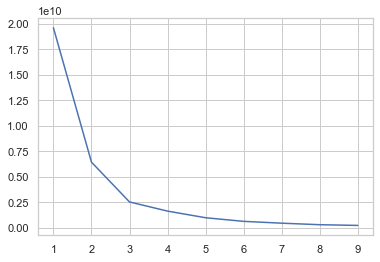

In [7]:
from sklearn.cluster import KMeans
 
A=df_medidor_franjas
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random')
X=df_medidor_franjas.iloc[:,0:2].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [9]:
kmeans.cluster_centers_

array([[  941.5798    ,  2366.58467312],
       [13347.52227857, 30934.38071429],
       [34250.0821    , 92660.8998    ]])

In [10]:
distance=kmeans.fit_transform(X)
distance

array([[13306.66166856, 20408.63743281, 33180.14622126],
       [48094.69271609, 14397.49016873,  1617.72303222],
       [47736.5653516 , 14045.55157787,  1270.95329704],
       [ 4177.98623158, 36044.17058974, 48708.72929114],
       [42879.43330464,  9186.20209176,  3597.95632078],
       [48237.1044487 , 14539.45109895,  1759.93699148],
       [43697.07970743, 10095.65931746,  2970.95268074],
       [46257.07566902, 12548.09408231,   439.66363428],
       [46663.35602869, 12969.91508547,   208.53673705],
       [44513.48355671, 10805.20995921,  2234.11207814],
       [47415.32892156, 13717.56844177,   937.98778982],
       [12838.9726499 , 23017.28860012, 35396.57108434],
       [48346.53995631, 14648.62720379,  1869.29452859],
       [48354.44068586, 14656.48964461,  1877.18418531],
       [46710.03405566, 13004.12462806,   338.66637649],
       [46636.46755033, 12944.38139944,   200.82736687],
       [48327.69471276, 14629.79946483,  1850.45216231],
       [48283.51570295, 14585.7

In [11]:
labels=kmeans.labels_
labels

array([0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2])

In [12]:
df_consumo_franjas = df_medidor_franjas
df_consumo_franjas['ClustersConsumoFranjas'] = labels
df_consumo_franjas

,LJ_manana,LJ_tarde,LJ_noche,V_manana,V_tarde,V_noche,SD_manana,SD_tarde,SD_noche,ClustersConsumoFranjas
medidor,,,,,,,,,,
15029828,13162.695000,32500.492500,3551.992500,1454.512500,3989.055000,350.805000,1294.702500,2133.075000,421.470000,0
15029835,117.894000,240.315000,24.264000,7.881000,14.493000,16.353000,366.159000,402.321000,57.306000,2
15029844,383.406000,517.584000,26.934000,151.596000,151.584000,2.700000,319.746000,365.442000,8.130000,2
15029846,22844.792250,45134.554500,1417.767750,6395.775750,12278.574000,0.000000,11612.175750,24706.347750,357.477750,0
15029847,2100.210000,5064.294000,34.026000,453.462000,970.962000,0.000000,380.844000,877.608000,23.442000,2
15029974,54.446250,112.492425,7.635450,10.413000,17.931675,0.445650,31.658625,52.335450,2.088750,2
15029977,2726.349000,3927.423000,633.078000,669.963000,1009.089000,98.424000,1216.134000,1885.182000,201.330000,2
15842884,445.323900,2097.522300,210.135000,133.847100,549.685800,21.790200,199.154100,1043.835000,74.187300,2
15842885,724.642500,1538.033100,73.884000,147.946500,320.211000,13.640700,146.066400,183.753900,6.629400,2


In [13]:
grupo0 = df_consumo_franjas.loc[df_consumo_franjas['ClustersConsumoFranjas']==0,:]

In [14]:
grupo1 = df_consumo_franjas.loc[df_consumo_franjas['ClustersConsumoFranjas']==1,:]

In [15]:
grupo2 = df_consumo_franjas.loc[df_consumo_franjas['ClustersConsumoFranjas']==2,:]

In [16]:
display(grupo0.head(30), grupo1.head(30), grupo2.head(30))

,LJ_manana,LJ_tarde,LJ_noche,V_manana,V_tarde,V_noche,SD_manana,SD_tarde,SD_noche,ClustersConsumoFranjas
medidor,,,,,,,,,,
15029828,13162.69500,32500.4925,3551.99250,1454.51250,3989.0550,350.8050,1294.70250,2133.07500,421.47000,0
15029846,22844.79225,45134.5545,1417.76775,6395.77575,12278.5740,0.0000,11612.17575,24706.34775,357.47775,0
16567733,19437.98850,31781.9565,6976.14750,6241.91400,14601.7620,1490.0445,8994.51000,13958.75250,2900.80350,0
52073321,11309.27060,35544.8606,645.46880,2814.40290,5657.6824,275.8468,1206.92760,3440.20200,194.29900,0
53307830,11202.21450,29975.8514,2778.17280,3340.07550,5942.3556,700.8180,3305.11150,7182.05790,780.74470,0
58706725,34250.08210,92660.8998,7686.85070,8501.72010,16617.7989,2472.5926,8662.41220,22962.37180,1661.44760,0


,LJ_manana,LJ_tarde,LJ_noche,V_manana,V_tarde,V_noche,SD_manana,SD_tarde,SD_noche,ClustersConsumoFranjas
medidor,,,,,,,,,,
16951212,7818.3420,21179.9490,4277.9100,2188.5150,5548.8090,1377.6630,4629.1140,11372.7810,2341.4160,1
20037205,4214.4030,11191.1550,749.5500,760.4940,2384.2590,0.0000,507.3000,1347.7830,87.5490,1
52073198,1817.7609,9164.0343,1117.2619,520.4962,2141.4440,75.6485,1086.5933,3264.4939,324.4545,1
52073201,7657.3531,20423.0005,6006.9700,3644.0123,6021.4299,539.9034,3524.2144,5289.9319,424.3838,1
52073218,3816.8835,14947.8955,250.6517,1010.2569,4148.0661,0.0000,1959.6458,8341.0950,0.0000,1
53307861,4996.7079,9936.8015,617.1919,932.2176,2100.2809,216.5771,1060.4709,2473.1548,414.0868,1
58706706,6992.9112,12521.6757,2981.5458,1754.1921,3067.1771,958.6166,3649.4469,6924.0244,1919.7495,1
58706740,4008.9113,10427.6526,1075.5035,1272.2037,2511.1760,266.1034,1521.1606,4791.3841,271.2204,1


,LJ_manana,LJ_tarde,LJ_noche,V_manana,V_tarde,V_noche,SD_manana,SD_tarde,SD_noche,ClustersConsumoFranjas
medidor,,,,,,,,,,
15029835,117.894000,240.315000,24.264000,7.881000,14.493000,16.353000,366.159000,402.321000,57.306000,2
15029844,383.406000,517.584000,26.934000,151.596000,151.584000,2.700000,319.746000,365.442000,8.130000,2
15029847,2100.210000,5064.294000,34.026000,453.462000,970.962000,0.000000,380.844000,877.608000,23.442000,2
15029974,54.446250,112.492425,7.635450,10.413000,17.931675,0.445650,31.658625,52.335450,2.088750,2
15029977,2726.349000,3927.423000,633.078000,669.963000,1009.089000,98.424000,1216.134000,1885.182000,201.330000,2
15842884,445.323900,2097.522300,210.135000,133.847100,549.685800,21.790200,199.154100,1043.835000,74.187300,2
15842885,724.642500,1538.033100,73.884000,147.946500,320.211000,13.640700,146.066400,183.753900,6.629400,2
15842894,513.408600,3971.510400,317.704800,153.311100,998.556300,69.677700,283.405800,1474.901700,89.193600,2
15842921,355.151400,877.499400,174.074100,91.353900,211.945500,8.650800,170.268900,356.335200,76.444200,2


## CLUSTERS GEOGRAFICOS

### Dataset de medidores filtrados con su latitud y longitud

In [17]:
df_filtrado_geo = df[['medidor','Latitud','Longitud']].groupby('medidor').mean()
df_filtrado_geo

,Latitud,Longitud
medidor,,
15029828,-1.85053,-79.4001
15029835,-1.56845,-79.4733
15029844,-1.62801,-79.5566
15029846,-1.54981,-79.7512
15029847,-1.79919,-79.5334
15029974,-1.56032,-79.7599
15029977,-1.44379,-79.7628
15842884,-1.55775,-79.7517
15842885,-1.79843,-79.5270


In [18]:
df_geo_consumo = df[['medidor','Latitud','Longitud','kwh_consumido']].groupby('medidor').mean()
df_geo_consumo

,Latitud,Longitud,kwh_consumido
medidor,,,
15029828,-1.85053,-79.4001,184.510345
15029835,-1.56845,-79.4733,3.473499
15029844,-1.62801,-79.5566,5.428513
15029846,-1.54981,-79.7512,341.773878
15029847,-1.79919,-79.5334,28.299566
15029974,-1.56032,-79.7599,0.851316
15029977,-1.44379,-79.7628,33.244548
15842884,-1.55775,-79.7517,20.853628
15842885,-1.79843,-79.5270,8.861819


### Aplicando DBSCAN para obtener clusters geograficos

In [19]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [20]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.1).fit(df_filtrado_geo)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(labels)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

[-1  0  0  1  0  1 -1  1  0  0 -1 -1  0  0  0  0 -1 -1 -1 -1  2  0  0  0
  0  0  0  2  0  2 -1 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  2  0  0  0  0  0  0  0  0  2  2  0 -1  2  2  0  0  0  0  0  0  0  0  0
  0  2  2  1  0  0  0  2  0  0  0  1  0  1  0  0  0  2  0 -1  0  0  0  1
  2  0  0  2  0]
Estimated number of clusters: 3
Estimated number of noise points: 12


In [21]:
df_filtrado_cluster = df_geo_consumo
df_filtrado_cluster['ClustersGeograficos'] = labels
df_filtrado_cluster

,Latitud,Longitud,kwh_consumido,ClustersGeograficos
medidor,,,,
15029828,-1.85053,-79.4001,184.510345,-1
15029835,-1.56845,-79.4733,3.473499,0
15029844,-1.62801,-79.5566,5.428513,0
15029846,-1.54981,-79.7512,341.773878,1
15029847,-1.79919,-79.5334,28.299566,0
15029974,-1.56032,-79.7599,0.851316,1
15029977,-1.44379,-79.7628,33.244548,-1
15842884,-1.55775,-79.7517,20.853628,1
15842885,-1.79843,-79.5270,8.861819,0


In [22]:
geo0 = df_filtrado_cluster.loc[df_filtrado_cluster['ClustersGeograficos']==0,:]

In [23]:
geo1 = df_filtrado_cluster.loc[df_filtrado_cluster['ClustersGeograficos']==1,:]

In [24]:
geo2 = df_filtrado_cluster.loc[df_filtrado_cluster['ClustersGeograficos']==2,:]

In [25]:
georuido = df_filtrado_cluster.loc[df_filtrado_cluster['ClustersGeograficos']==-1,:]

In [26]:
display(geo0.head(30), geo1.head(30), geo2.head(30),georuido.head(30))

,Latitud,Longitud,kwh_consumido,ClustersGeograficos
medidor,,,,
15029835,-1.56845,-79.4733,3.473499,0
15029844,-1.62801,-79.5566,5.428513,0
15029847,-1.79919,-79.5334,28.299566,0
15842885,-1.79843,-79.5270,8.861819,0
15842894,-1.84812,-79.5505,21.987905,0
16567738,-1.77115,-79.6313,0.304863,0
16567740,-1.77115,-79.6313,0.104503,0
16567743,-1.79777,-79.5306,12.729177,0
16567746,-1.78370,-79.6816,11.981426,0


,Latitud,Longitud,kwh_consumido,ClustersGeograficos
medidor,,,,
15029846,-1.54981,-79.7512,341.773878,1
15029974,-1.56032,-79.7599,0.851316,1
15842884,-1.55775,-79.7517,20.853628,1
16951212,-1.56186,-79.7504,180.221065,1
52073295,-1.59453,-79.7246,11.789210,1
53307830,-1.55706,-79.7553,356.324601,1
53307861,-1.56128,-79.7567,71.532986,1
58706704,-1.64375,-79.8022,34.338476,1


,Latitud,Longitud,kwh_consumido,ClustersGeograficos
medidor,,,,
16567761,-1.43453,-79.4659,0.322252,2
16951179,-1.43453,-79.4659,0.810215,2
16951182,-1.43453,-79.4659,1.088426,2
20037214,-1.43082,-79.5620,16.732155,2
35925294,-1.44894,-79.4742,68.706426,2
35925308,-1.42777,-79.4642,18.934655,2
35946920,-1.44799,-79.4511,100.806502,2
35947190,-1.42770,-79.4637,23.935679,2
52073290,-1.43925,-79.4658,36.994373,2


,Latitud,Longitud,kwh_consumido,ClustersGeograficos
medidor,,,,
15029828,-1.85053,-79.4001,184.510345,-1
15029977,-1.44379,-79.7628,33.244548,-1
15842921,-1.80610,-79.3035,12.349593,-1
16567733,-1.19584,-79.4249,369.388469,-1
16567757,-1.26879,-79.4269,0.255824,-1
16567758,-1.26879,-79.4269,0.595046,-1
16567759,-1.45009,-79.7651,0.589646,-1
16567760,-1.44995,-79.7651,0.922449,-1
16951195,-1.72011,-79.2920,55.288800,-1


#### CONCLUSIONES:
#### NO HAY RELACION VISIBLE ENTRE CONSUMO Y LOCACION GEOGRAFICA

In [27]:
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels,
#                                            average_method='arithmetic'))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

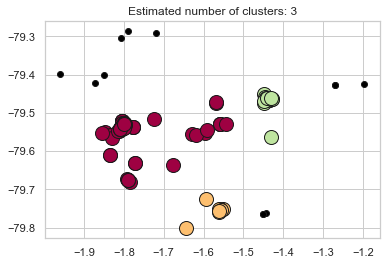

In [28]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    #print(type(xy))
    #print(xy)
    xy = df_filtrado_cluster[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_filtrado_cluster[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.show()

## Clúster de factor de potencia

In [29]:
#medidores = list(df_filtrado_horas["medidor"].unique())
#nodos = open("nodos.csv", "w")
#nodos.write("id,label,powerfactor\n")
#nodo_1 = []
#for i,m in enumerate(medidores):
 #   lat = str(df_filtrado_horas[df_filtrado_horas["medidor"]==m]["Latitud"].unique()[0])
 #   long = str(df_filtrado_horas[df_filtrado_horas["medidor"]==m]["Longitud"].unique()[0])
#    powerfactor=str(df_filtrado_horas[df_filtrado_horas["medidor"]==m]["powerfactorsystem"].mean())
#  if not(lat == "0.0" and long == "0.0"):
  #      nodos.write(str(i+1)+","+str(m)+","+powerfactor+"\n")
   #     nodo_1.append(m)
#nodos.close()

In [30]:
df_factorP=df[["medidor","powerfactorsystem"]].groupby("medidor").mean()
df_power=df_factorP.sample(int(df_factorP.shape[0]*0.80))
df_power

,powerfactorsystem
medidor,
52073302,0.925440
16951205,-0.289959
16567763,0.928750
58706655,0.920710
53307859,0.954216
16951180,0.917167
35924882,0.879832
15029847,0.939273
58706662,0.948333


k: 1  cost: 7.8408392528206265
k: 2  cost: 0.9582579072549993
k: 3  cost: 0.46896485815547373
k: 4  cost: 0.30113671576214424
k: 5  cost: 0.19509954127347165
k: 6  cost: 0.1067069843851663
k: 7  cost: 0.06760290083551963
k: 8  cost: 0.0547247501193008
k: 9  cost: 0.03844834870554


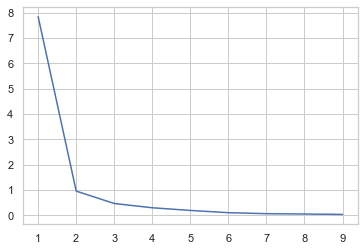

In [31]:
from sklearn.cluster import KMeans
 
A=df_power
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'random')
X=df_power.iloc[:,0:2].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [33]:
kmeans.cluster_centers_

array([[0.17320562],
       [0.90648706]])

In [34]:
distance=kmeans.fit_transform(X)
distance

array([[1.89525029e-02, 7.52233941e-01],
       [1.19644632e+00, 4.63164879e-01],
       [2.22625052e-02, 7.55543943e-01],
       [1.42233250e-02, 7.47504763e-01],
       [4.77291587e-02, 7.81010597e-01],
       [1.06797055e-02, 7.43961144e-01],
       [2.66546553e-02, 7.06626783e-01],
       [3.27860853e-02, 7.66067524e-01],
       [4.18462758e-02, 7.75127714e-01],
       [8.76133609e-02, 8.20894799e-01],
       [4.59738248e-02, 7.79255263e-01],
       [9.06487058e-01, 1.73205619e-01],
       [9.28712383e-02, 6.40410200e-01],
       [6.70847246e-01, 6.24341926e-02],
       [1.19145931e-01, 6.14135507e-01],
       [9.06487058e-01, 1.73205619e-01],
       [8.79232538e-01, 1.45951100e-01],
       [4.31537242e-02, 6.90127714e-01],
       [7.69091689e-02, 8.10190607e-01],
       [1.22023853e-02, 7.45483824e-01],
       [5.65680292e-02, 6.76713409e-01],
       [2.90448574e-02, 7.62326296e-01],
       [7.45129425e-02, 8.07794381e-01],
       [4.60843710e-02, 7.79365809e-01],
       [7.831026

In [35]:
labels=kmeans.labels_
labels

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [36]:
df_consumo = df_power
df_consumo['ClustersConsumo'] = labels
df_consumo

,powerfactorsystem,ClustersConsumo
medidor,,
52073302,0.925440,0
16951205,-0.289959,1
16567763,0.928750,0
58706655,0.920710,0
53307859,0.954216,0
16951180,0.917167,0
35924882,0.879832,0
15029847,0.939273,0
58706662,0.948333,0


## CLUSTERS ELECTRICOS

In [37]:
dfelec=df[["medidor","voltajeA","voltajeB","voltajeC","corrienteA","corrienteB","corrienteC","angvoltajeA","angvoltajeB","angvoltajeC","angcorrienteA","angcorrienteB","angcorrienteC"]].groupby("medidor").mean()
dfelec

,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,angcorrienteA,angcorrienteB,angcorrienteC
medidor,,,,,,,,,,,,
15029828,114.033543,117.097061,114.459439,2.379338,0.571591,1.131929,0.0,120.188088,239.717868,277.071470,71.555045,169.359724
15029835,125.551201,124.360481,126.617977,0.160938,0.114581,0.148513,0.0,240.000000,120.000000,101.438368,243.000016,97.189675
15029844,272.781297,268.488425,270.056514,0.059670,0.045635,0.065991,0.0,120.084507,239.915493,49.047401,121.570651,244.845418
15029846,116.642239,108.174467,108.252535,2.334004,3.050720,3.041813,0.0,120.000000,240.000000,323.184023,97.802242,250.098790
15029847,123.766177,124.318756,122.948835,0.526322,0.467777,0.520437,0.0,240.000000,120.000000,203.005052,228.049778,139.247523
15029974,110.732251,108.629564,108.072886,1.344759,1.257711,1.038958,0.0,240.000000,120.000000,48.019401,240.149697,129.375614
15029977,264.334891,266.518957,261.835133,0.659439,0.713172,0.644015,0.0,240.000000,120.000000,14.824380,251.562967,130.982908
15842884,233.424865,0.000000,0.000000,33.528917,0.000000,0.000000,0.0,0.000000,0.000000,13.201550,0.000000,0.000000
15842885,246.684014,0.000000,0.000000,18.568396,0.000000,0.000000,0.0,0.000000,0.000000,127.622803,0.000000,0.000000


In [38]:
dfelec_escalado = (dfelec-dfelec.min())/(dfelec.max()-dfelec.min())
dfelec_escalado
dfelec_escalado.fillna(0, inplace=True)
dfelec_escalado

,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,angcorrienteA,angcorrienteB,angcorrienteC
medidor,,,,,,,,,,,,
15029828,0.017115,0.174492,0.169109,0.046921,0.021501,0.019101,0.0,0.145893,0.297014,0.798413,0.264375,0.585356
15029835,0.037438,0.185315,0.187072,0.003174,0.004310,0.002506,0.0,0.291330,0.148682,0.292306,0.897815,0.335916
15029844,0.297237,0.400087,0.398996,0.001177,0.001717,0.001114,0.0,0.145767,0.297258,0.141336,0.449169,0.846256
15029846,0.021718,0.161196,0.159938,0.046027,0.114758,0.051329,0.0,0.145665,0.297363,0.931291,0.361351,0.864414
15029847,0.034289,0.185253,0.181651,0.010379,0.017596,0.008782,0.0,0.291330,0.148682,0.584982,0.842579,0.481280
15029974,0.011289,0.161874,0.159673,0.026519,0.047311,0.017532,0.0,0.291330,0.148682,0.138373,0.887284,0.447159
15029977,0.282333,0.397152,0.386850,0.013004,0.026827,0.010867,0.0,0.291330,0.148682,0.042718,0.929453,0.452715
15842884,0.227790,0.000000,0.000000,0.661195,0.000000,0.000000,0.0,0.000000,0.000000,0.038042,0.000000,0.000000
15842885,0.251186,0.000000,0.000000,0.366171,0.000000,0.000000,0.0,0.000000,0.000000,0.367760,0.000000,0.000000


k: 1  cost: 75.09308436634169
k: 2  cost: 40.348895837880235
k: 3  cost: 29.585314826819854
k: 4  cost: 24.811029255899655
k: 5  cost: 20.113290415493758
k: 6  cost: 17.754024572218807
k: 7  cost: 15.660918171517618
k: 8  cost: 14.084600237457394
k: 9  cost: 12.033786311900204


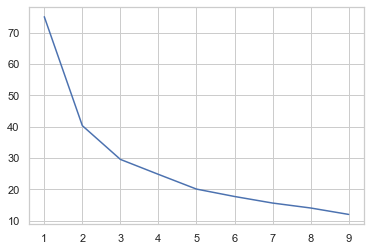

In [39]:
from sklearn.cluster import KMeans
 
A=dfelec_escalado
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'random')
X=dfelec_escalado.iloc[:,0:2].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [41]:
kmeans.cluster_centers_

array([[ 5.79187721e-02,  2.00853236e-01],
       [ 9.59278463e-01,  9.72898541e-01],
       [ 1.39452414e-01, -1.66533454e-16]])

In [42]:
distance=kmeans.fit_transform(X)
distance

array([[1.23496002, 0.04857892, 0.21310531],
       [1.21246715, 0.0257075 , 0.21153861],
       [0.8754496 , 0.31139572, 0.43007612],
       [1.24011346, 0.05369569, 0.19961331],
       [1.21490399, 0.02831522, 0.21302139],
       [1.24757549, 0.06077586, 0.20646778],
       [0.88867288, 0.29815243, 0.42207171],
       [1.21721295, 0.26305543, 0.0883373 ],
       [1.20329789, 0.27873721, 0.11173408],
       [1.20158759, 0.28076296, 0.11464439],
       [1.21813934, 0.26206327, 0.0867968 ],
       [1.23875817, 0.05211951, 0.20204797],
       [0.0304116 , 1.15655767, 1.24293847],
       [0.02407399, 1.16839931, 1.25661728],
       [1.20053699, 0.01421121, 0.21636997],
       [1.18790977, 0.00200766, 0.21801644],
       [1.2499868 , 0.06332748, 0.21004581],
       [1.24650294, 0.05971061, 0.20698102],
       [1.23616242, 0.05045557, 0.21713428],
       [1.23610168, 0.05041505, 0.21723164],
       [0.00461507, 1.18406054, 1.27015302],
       [0.01118483, 1.17692009, 1.26335563],
       [0.

In [43]:
labels=kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2])

In [44]:
df_elec_cluster = dfelec
df_elec_cluster['ClustersElectricos'] = labels
df_elec_cluster

,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,angcorrienteA,angcorrienteB,angcorrienteC,ClustersElectricos
medidor,,,,,,,,,,,,,
15029828,114.033543,117.097061,114.459439,2.379338,0.571591,1.131929,0.0,120.188088,239.717868,277.071470,71.555045,169.359724,1
15029835,125.551201,124.360481,126.617977,0.160938,0.114581,0.148513,0.0,240.000000,120.000000,101.438368,243.000016,97.189675,1
15029844,272.781297,268.488425,270.056514,0.059670,0.045635,0.065991,0.0,120.084507,239.915493,49.047401,121.570651,244.845418,1
15029846,116.642239,108.174467,108.252535,2.334004,3.050720,3.041813,0.0,120.000000,240.000000,323.184023,97.802242,250.098790,1
15029847,123.766177,124.318756,122.948835,0.526322,0.467777,0.520437,0.0,240.000000,120.000000,203.005052,228.049778,139.247523,1
15029974,110.732251,108.629564,108.072886,1.344759,1.257711,1.038958,0.0,240.000000,120.000000,48.019401,240.149697,129.375614,1
15029977,264.334891,266.518957,261.835133,0.659439,0.713172,0.644015,0.0,240.000000,120.000000,14.824380,251.562967,130.982908,1
15842884,233.424865,0.000000,0.000000,33.528917,0.000000,0.000000,0.0,0.000000,0.000000,13.201550,0.000000,0.000000,2
15842885,246.684014,0.000000,0.000000,18.568396,0.000000,0.000000,0.0,0.000000,0.000000,127.622803,0.000000,0.000000,2


### Caracterizacion de clusters electricos

In [45]:
grupo0 = df_elec_cluster.loc[df_elec_cluster['ClustersElectricos']==0,:]

In [46]:
grupo1 = df_elec_cluster.loc[df_elec_cluster['ClustersElectricos']==1,:]

In [47]:
grupo2 = df_elec_cluster.loc[df_elec_cluster['ClustersElectricos']==2,:]

In [48]:
display(grupo0.head(30), grupo1.head(30), grupo2.head(30))

,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,angcorrienteA,angcorrienteB,angcorrienteC,ClustersElectricos
medidor,,,,,,,,,,,,,
16567738,633.792684,641.276471,651.644346,0.330581,0.448888,0.407660,0.0,120.0,240.0,347.027796,122.559552,242.280887,0
16567740,634.324071,652.657246,641.949656,1.486732,0.817544,0.999348,0.0,240.0,120.0,18.221734,133.769486,256.657533,0
16567761,645.415794,653.577533,645.146731,0.567102,0.973876,1.244307,0.0,240.0,120.0,24.545203,270.656973,145.139067,0
16567762,641.784491,651.225886,636.412006,1.033072,0.975227,1.131807,0.0,240.0,120.0,23.439607,263.375889,142.610768,0
16567763,641.881236,650.311370,636.175746,1.003907,0.999053,1.182951,0.0,240.0,120.0,22.175280,264.340891,138.266105,0
16567764,642.254540,650.312015,635.873173,1.000111,0.876816,1.098688,0.0,240.0,120.0,24.430170,262.106258,142.968095,0
16951179,645.272061,653.714773,645.030770,2.071286,2.360017,2.306699,0.0,240.0,120.0,23.972245,263.925724,142.583523,0
16951180,641.761408,650.220691,636.520191,1.405441,1.523014,1.566174,0.0,240.0,120.0,25.046103,263.856822,141.335634,0
16951182,645.301062,653.943411,645.489479,3.041468,1.944940,3.588790,0.0,240.0,120.0,19.930323,262.127138,140.455331,0


,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,angcorrienteA,angcorrienteB,angcorrienteC,ClustersElectricos
medidor,,,,,,,,,,,,,
15029828,114.033543,117.097061,114.459439,2.379338,0.571591,1.131929,0.0,120.188088,239.717868,277.071470,71.555045,169.359724,1
15029835,125.551201,124.360481,126.617977,0.160938,0.114581,0.148513,0.0,240.000000,120.000000,101.438368,243.000016,97.189675,1
15029844,272.781297,268.488425,270.056514,0.059670,0.045635,0.065991,0.0,120.084507,239.915493,49.047401,121.570651,244.845418,1
15029846,116.642239,108.174467,108.252535,2.334004,3.050720,3.041813,0.0,120.000000,240.000000,323.184023,97.802242,250.098790,1
15029847,123.766177,124.318756,122.948835,0.526322,0.467777,0.520437,0.0,240.000000,120.000000,203.005052,228.049778,139.247523,1
15029974,110.732251,108.629564,108.072886,1.344759,1.257711,1.038958,0.0,240.000000,120.000000,48.019401,240.149697,129.375614,1
15029977,264.334891,266.518957,261.835133,0.659439,0.713172,0.644015,0.0,240.000000,120.000000,14.824380,251.562967,130.982908,1
16567733,116.360654,109.951386,108.871023,1.069742,1.303033,1.267901,0.0,120.000000,240.000000,49.697147,130.193690,261.643295,1
16567743,129.894012,130.668385,129.198626,0.758114,0.174589,0.809261,0.0,240.000000,120.000000,193.954090,242.429615,85.883308,1


,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,angvoltajeC,angcorrienteA,angcorrienteB,angcorrienteC,ClustersElectricos
medidor,,,,,,,,,,,,,
15842884,233.424865,0.0,0.000000,33.528917,0.0,0.000000,0.0,0.0,0.000000,13.201550,0.0,0.000000,2
15842885,246.684014,0.0,0.000000,18.568396,0.0,0.000000,0.0,0.0,0.000000,127.622803,0.0,0.000000,2
15842894,248.333310,0.0,0.000000,50.709573,0.0,0.000000,0.0,0.0,0.000000,30.884168,0.0,0.000000,2
15842921,232.551851,0.0,0.000000,16.949819,0.0,0.000000,0.0,0.0,0.000000,37.266840,0.0,0.000000,2
17548289,242.877329,0.0,0.000000,1.387539,0.0,0.000000,0.0,0.0,0.000000,98.884058,0.0,0.000000,2
28006904,242.976970,0.0,0.000000,2.297576,0.0,1.524848,0.0,0.0,0.000000,70.155152,0.0,28.891515,2
35924863,245.761326,0.0,0.000000,27.049724,0.0,26.635359,0.0,0.0,0.000000,28.011050,0.0,180.803867,2
35924864,243.364444,0.0,0.000000,2.077222,0.0,2.116111,0.0,0.0,0.000000,19.531111,0.0,16.556111,2
35924866,246.606748,0.0,0.000000,16.219018,0.0,17.770552,0.0,0.0,0.000000,78.218405,0.0,148.919632,2


### CONCLUSIONES:

#### GRUPO 0: TRIFASICO, VOLTAJES VALORES DE 100 A 300
#### GRUPO 1: MONOFASICO (ALGUNOS BIFASICO)
#### GRUPO 2: VOLTAJES VALORES MAYORES A 600, ANGULOS VOLTAJE EXACTOS

# SERIES DE TIEMPO (RESAMPLE CADA 8H)

In [49]:
dfff = pd.DataFrame()
count=0
for n,g in df.groupby("medidor"):
    g.set_index("fecha", inplace = True)
    g = g.resample("8H").mean()
    if(count==0):
        dfff=g
    else:
        dfff=pd.concat(dfff,g)
dfff

,medidor,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,angvoltajeA,angvoltajeB,...,dayNumber,LJ_manana,LJ_tarde,LJ_noche,V_manana,V_tarde,V_noche,SD_manana,SD_tarde,SD_noche
fecha,,,,,,,,,,,,,,,,,,,,,
2019-04-04 08:00:00,59814806.0,1143376.5,125.10,0.0,124.80,1.00,0.0,0.70,0.0,0.0,...,3.0,21.7432,51.9087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-04 16:00:00,59814806.0,1144512.0,126.20,0.0,125.90,0.80,0.0,0.10,0.0,0.0,...,3.0,NaN,35.7355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-05 08:00:00,59814806.0,1148354.0,124.40,0.0,124.10,0.85,0.0,1.15,0.0,0.0,...,4.0,NaN,NaN,NaN,17.6496,31.4405,NaN,NaN,NaN,NaN
2019-04-05 16:00:00,59814806.0,1149781.0,126.90,0.0,126.80,0.80,0.0,0.90,0.0,0.0,...,4.0,NaN,NaN,NaN,NaN,37.5810,NaN,NaN,NaN,NaN
2019-04-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-06 08:00:00,59814806.0,1153380.5,125.60,0.0,125.35,0.80,0.0,0.95,0.0,0.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,20.6695,35.3329,NaN
2019-04-06 16:00:00,59814806.0,1154396.0,126.30,0.0,126.20,0.70,0.0,0.80,0.0,0.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.8361,NaN
2019-04-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
dfff.index

DatetimeIndex(['2019-04-04 08:00:00', '2019-04-04 16:00:00',
               '2019-04-05 00:00:00', '2019-04-05 08:00:00',
               '2019-04-05 16:00:00', '2019-04-06 00:00:00',
               '2019-04-06 08:00:00', '2019-04-06 16:00:00',
               '2019-04-07 00:00:00', '2019-04-07 08:00:00',
               ...
               '2019-05-31 16:00:00', '2019-06-01 00:00:00',
               '2019-06-01 08:00:00', '2019-06-01 16:00:00',
               '2019-06-02 00:00:00', '2019-06-02 08:00:00',
               '2019-06-02 16:00:00', '2019-06-03 00:00:00',
               '2019-06-03 08:00:00', '2019-06-03 16:00:00'],
              dtype='datetime64[ns]', name='fecha', length=182, freq='8H')